In [1]:
from DataFetcher import DataFetcher
from USTs import USTs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

In [2]:
auctions = DataFetcher().fetch_auction_data()
prices = DataFetcher().fetch_historical_UST_data(date=datetime.datetime(year=2025, month=6, day=23))

In [3]:
ust_set = USTs(auction_data=auctions, price_data=prices)
ust_set = ust_set.get_current_UST_set(as_of_date=datetime.date(2025, 6, 24),
                                      get_ytms=True, include_FRNs=False, include_TIPS=False)

Merged auction and price data successfully
No missing or excess data
All CUSIPs are identical between DataFrames


In [4]:
ust_set

,Cusip,Security type,Rate,Maturity date,Buy,Sell,End of day,security_term,issue_date,EOD YTM
0,912797PT8,Bill,0.000,2025-06-24,0.000000,99.988361,100.000000,17-Week,2025-02-25,0.000000
1,912797NW3,Bill,0.000,2025-06-26,0.000000,99.965667,99.977556,26-Week,2024-12-26,0.045000
2,912797PU5,Bill,0.000,2025-07-01,99.908778,99.908667,99.920667,17-Week,2025-03-04,0.243000
3,912797NX1,Bill,0.000,2025-07-03,99.885833,99.885556,99.897000,26-Week,2025-01-02,0.207000
4,912797PZ4,Bill,0.000,2025-07-08,99.828750,99.828333,99.840167,17-Week,2025-03-11,0.490000
...,...,...,...,...,...,...,...,...,...,...
392,912810UA4,Bond,4.625,2054-05-15,96.187500,96.156250,95.812500,30-Year,2024-05-15,4.898984
393,912810UC0,Bond,4.250,2054-08-15,90.421875,90.406250,90.062500,30-Year,2024-08-15,4.891323
394,912810UE6,Bond,4.500,2054-11-15,94.390625,94.375000,94.000000,30-Year,2024-11-15,4.887842
395,912810UG1,Bond,4.625,2055-02-15,96.437500,96.406250,96.062500,30-Year,2025-02-18,4.875975


/tmp/ipykernel_71828/3361625180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:, 'days to expiry'] = (filtered_data['Maturity date'] - pd.Timestamp.today().normalize()).dt.days


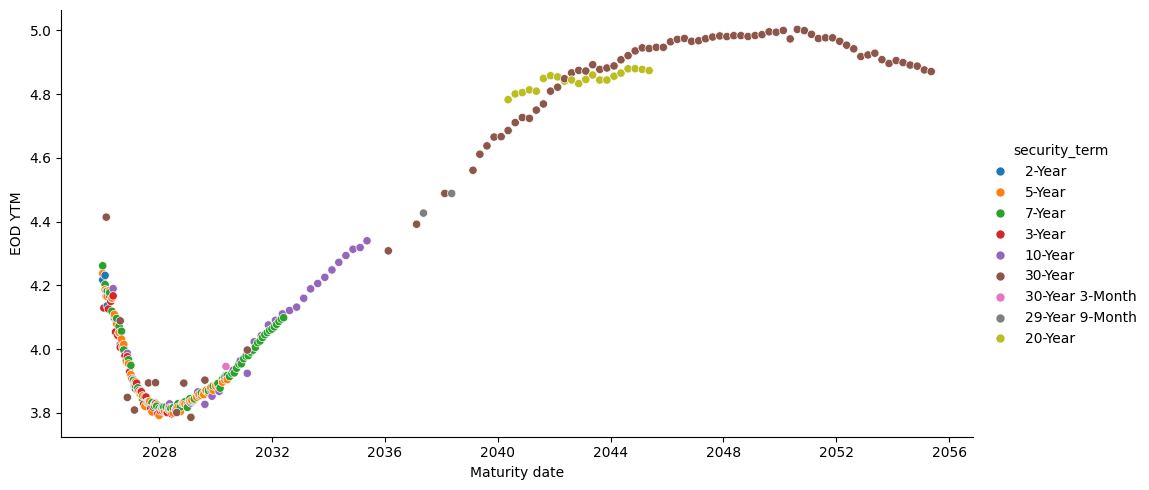

In [5]:
filtered_data = ust_set[ust_set['Security type'] != 'Bill']
filtered_data.loc[:, 'days to expiry'] = (filtered_data['Maturity date'] - pd.Timestamp.today().normalize()).dt.days
filtered_data = filtered_data[filtered_data['days to expiry'] > 180]
sns.relplot(data=filtered_data, x='Maturity date', y='EOD YTM', kind='scatter', hue='security_term', aspect=2, height=5)

In [6]:
filtered_data[filtered_data['security_term'] == '7-Year'].head(40)

,Cusip,Security type,Rate,Maturity date,Buy,Sell,End of day,security_term,issue_date,EOD YTM,days to expiry
78,9128285T3,Note,2.625,2025-12-31,99.203125,99.15625,99.15625,7-Year,2018-12-31,4.261740,188
81,9128286A3,Note,2.625,2026-01-31,99.062500,99.03125,99.03125,7-Year,2019-01-31,4.202660,219
86,9128286F2,Note,2.500,2026-02-28,98.875000,98.84375,98.84375,7-Year,2019-02-28,4.182239,247
91,9128286L9,Note,2.250,2026-03-31,98.578125,98.56250,98.56250,7-Year,2019-04-01,4.177402,278
94,9128286S4,Note,2.375,2026-04-30,98.562500,98.53125,98.56250,7-Year,2019-04-30,4.119033,308
99,9128286X3,Note,2.125,2026-05-31,98.218750,98.18750,98.18750,7-Year,2019-05-31,4.105472,339
104,9128287B0,Note,1.875,2026-06-30,97.859375,97.84375,97.81250,7-Year,2019-07-01,4.096485,369
107,912828Y95,Note,1.875,2026-07-31,97.671875,97.65625,97.65625,7-Year,2019-07-31,4.071787,400
112,912828YD6,Note,1.375,2026-08-31,96.984375,96.96875,96.93750,7-Year,2019-09-03,4.056461,431
117,912828YG9,Note,1.625,2026-09-30,97.125000,97.09375,97.09375,7-Year,2019-09-30,3.997509,461
